In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,cross_val_score,LeaveOneOut,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/NIFTY-50 DATA.csv')
print("Dataset Preview")
df.head()

Dataset Preview


,Company,Open,Previous Close,Volume,Value (Lacs),VWAP,Beta,Mkt Cap (Rs. Cr.),High,Low,...,20D Avg Volume,20D Avg Delivery (%),Book Value Per Share,Dividend Yield,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Reliance Industries,1367,1364,12045916,164872.45,1369.56,1.18,1852189,1378.6,1362.7,...,9538459,52.58,605.55,0.40,NaN,NaN,NaN,NaN,NaN,NaN
1,HDFC Bank,952.7,951,25350832,244698.91,961.74,0.88,1482658,969.6,946,...,18603480,64.98,337.22,2.28,NaN,NaN,NaN,NaN,NaN,NaN
2,Bharti Airtel,1868,1878.4,5675393,105993.64,1866.9,0.91,1083241,1877,1855.9,...,4760082,62.36,150.17,0.86,NaN,NaN,NaN,NaN,NaN,NaN
3,TCS,2891,2888.4,1952902,56911.47,2897.26,0.92,1054383,2924.8,2866.6,...,2694522,60.89,261.89,4.32,NaN,NaN,NaN,NaN,NaN,NaN
4,ICICI Bank,1348,1348,20952632,287470.11,1368.92,1.09,980116,1379.4,1347.1,...,10999658,61.59,436.52,0.80,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(42, 27)

In [ ]:
df.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'], axis=1, inplace=True)

In [ ]:
df.drop(['Dividend Yield'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
Company,0
Open,0
Previous Close,0
Volume,0
Value (Lacs),0
VWAP,0
Beta,0
Mkt Cap (Rs. Cr.),0
High,0
Low,0


In [ ]:
df.dtypes

,0
Company,object
Open,object
Previous Close,object
Volume,object
Value (Lacs),object
VWAP,object
Beta,float64
Mkt Cap (Rs. Cr.),object
High,object
Low,object


In [ ]:
# Corrected classification logic
def risk_category(beta):
    if beta < 0.8:
        return "Low"
    elif 0.8 <= beta <= 1.2:    #<= 1:
        return "Medium"
    else:
        return "High"

df['Risk'] = df['Beta'].apply(risk_category)

# Display full list of stocks under each risk category
low_stocks = df[df['Risk'] == 'Low']['Company'].tolist()
medium_stocks = df[df['Risk'] == 'Medium']['Company'].tolist()
high_stocks = df[df['Risk'] == 'High']['Company'].tolist()

print(" Low Risk (Low Beta) Stocks:")
print(low_stocks)

print("\n Medium Risk (Moderate Beta) Stocks:")
print(medium_stocks)

print("\n High Risk (High Beta) Stocks:")
print(high_stocks)

 Low Risk (Low Beta) Stocks:
['SBI', 'HUL', 'ITC', 'Sun Pharma', 'Nestle India', 'Asian Paints', 'Dr. Reddy', 'Asian Paints']

 Medium Risk (Moderate Beta) Stocks:
['Reliance Industries', 'HDFC Bank', 'Bharti Airtel', 'TCS', 'ICICI Bank', 'Infosys', 'LIC', 'Kotak Bank', 'UltraTech Cement', 'Power Grid Corp.', 'HCL Tech', 'Wipro', 'ONGC', 'JSW Steel', 'UPL', 'Bharti Infratel', 'ICICI Lombard', 'HDFC Life Insurance', 'Bajaj Auto', 'Adani Power', 'Hero MotoCorp', 'Tech Mahindra', 'IndusInd Bank', 'Shree Cement', 'Eicher Motors', 'Titan Company']

 High Risk (High Beta) Stocks:
['Larsen & Toubro', 'Maruti Suzuki', 'M&M', 'Tata Motors', 'GAIL (India)', 'Adani Green Energy', 'Tata Steel', 'Adani Ports & SEZ']


In [ ]:
# Define Risk based on Beta
#def risk_category(beta):
    #if beta < 1:
        #return "Low"
    #elif beta <= 1:
        #return "Medium"
    #else:
        #return "High"

#df['Risk'] = df['Beta'].apply(risk_category)
#df[['Company','Beta','Risk']].head()


,Company,Beta,Risk
0,Reliance Industries,1.18,High
1,HDFC Bank,0.88,Low
2,Bharti Airtel,0.91,Low
3,TCS,0.92,Low
4,ICICI Bank,1.09,High


In [ ]:
df.select_dtypes(include=['object']).columns

Index(['Company', 'Open', 'Previous Close', 'Volume', 'Value (Lacs)', 'VWAP',
       'Mkt Cap (Rs. Cr.)', 'High', 'Low', 'UC Limit', 'LC Limit', '52W High',
       '52W Low', 'All Time High', '20D Avg Volume', 'Book Value Per Share',
       'Risk'],
      dtype='object')

In [ ]:
obj = ['Open', 'Previous Close', 'Volume', 'Value (Lacs)', 'VWAP',
                        'Mkt Cap (Rs. Cr.)', 'High', 'Low', 'UC Limit', 'LC Limit',
                        '52W High', '52W Low', 'All Time High', '20D Avg Volume',
                        'Book Value Per Share']


In [ ]:
x=df.drop(columns=['Company','Risk','Beta'],axis=1)
y=df['Risk']

In [ ]:
# Clean and convert these columns to numeric
for col in obj:
    if col in x.columns: # Check if column exists in x after dropping
        x[col] = x[col].astype(str).str.replace(',', '', regex=False)
        x[col] = pd.to_numeric(x[col], errors='coerce')

In [ ]:
# Handle any remaining NaN values after conversion (e.g., fill with mean or median)
# For this example, I will fill with the mean of the column
for col in obj:
     if col in x.columns and x[col].isnull().any():
        mean_val = x[col].mean()
        x[col].fillna(mean_val, inplace=True)

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
x_test.shape,y_test.shape

((9, 18), (9,))

In [ ]:
x_train.shape,y_train.shape

((33, 18), (33,))

In [ ]:
log_reg = LogisticRegression(multi_class='ovr', max_iter=1000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [ ]:
y_pred_lr = log_reg.predict(x_test)

In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

Logistic Regression Accuracy: 0.4444444444444444
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         2
         Low       0.00      0.00      0.00         2
      Medium       0.50      0.80      0.62         5

    accuracy                           0.44         9
   macro avg       0.17      0.27      0.21         9
weighted avg       0.28      0.44      0.34         9



In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

Random Forest Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         2
         Low       1.00      0.50      0.67         2
      Medium       0.62      1.00      0.77         5

    accuracy                           0.67         9
   macro avg       0.54      0.50      0.48         9
weighted avg       0.57      0.67      0.58         9



In [ ]:
df.head()

,Company,Open,Previous Close,Volume,Value (Lacs),VWAP,Beta,Mkt Cap (Rs. Cr.),High,Low,...,LC Limit,52W High,52W Low,Face Value,All Time High,All Time Low,20D Avg Volume,20D Avg Delivery (%),Book Value Per Share,Risk
0,Reliance Industries,1367,1364,12045916,164872.45,1369.56,1.18,1852189,1378.6,1362.7,...,1227.6,1551,1114.85,10,1608.8,24.42,9538459,52.58,605.55,Medium
1,HDFC Bank,952.7,951,25350832,244698.91,961.74,0.88,1482658,969.6,946,...,855.9,1018.85,806.5,1,1018.85,7.85,18603480,64.98,337.22,Medium
2,Bharti Airtel,1868,1878.4,5675393,105993.64,1866.9,0.91,1083241,1877,1855.9,...,1690.6,2045.8,1511,5,2045.8,9.31,4760082,62.36,150.17,Medium
3,TCS,2891,2888.4,1952902,56911.47,2897.26,0.92,1054383,2924.8,2866.6,...,2599.6,4494.9,2866.6,1,4592.25,103.84,2694522,60.89,261.89,Medium
4,ICICI Bank,1348,1348,20952632,287470.11,1368.92,1.09,980116,1379.4,1347.1,...,1213.2,1500,1186,2,1500,12.00,10999658,61.59,436.52,Medium


In [ ]:
x_train[0:5]

array([[-0.31663439, -0.31658106, -0.42217708, -0.42215109, -0.31723857,
        -0.08134785, -0.31843913, -0.31534865, -0.31664978, -0.31649713,
        -0.25874485, -0.26812697, -0.65298516, -0.28029511, -0.42317389,
        -0.30185587,  0.79952119, -0.29272472],
       [-0.43858064, -0.43777613, -0.4854905 , -0.72868823, -0.43921024,
        -0.64538213, -0.43915938, -0.43882485, -0.4378603 , -0.43768399,
        -0.46798376, -0.4464316 ,  1.47714118, -0.48913898,  1.78604762,
        -0.29004782, -0.01596289, -0.47585293],
       [ 0.07510036,  0.07706914, -0.41228956,  0.37144171,  0.08513616,
         0.06108316,  0.08473451,  0.08128486,  0.07703245,  0.07711386,
         0.04184126,  0.01039258,  0.14581222,  0.0197235 , -0.47215085,
        -0.28714649,  0.02967987,  0.0283921 ],
       [-0.51775225, -0.51750287, -0.25254696, -0.68342224, -0.51816177,
        -0.83623491, -0.51843563, -0.5181418 , -0.5175923 , -0.51739358,
        -0.53660611, -0.51387441,  1.47714118, -0.545

In [ ]:
!pip install yfinance

 Live price of RELIANCE.NS: ₹1375.90

 Last 5 entries of 1-month price data:
                                  Open         High          Low        Close  \
Date                                                                            
2025-10-08 00:00:00+05:30  1384.800049  1389.000000  1364.500000  1367.400024   
2025-10-09 00:00:00+05:30  1374.000000  1380.000000  1369.099976  1377.800049   
2025-10-10 00:00:00+05:30  1377.800049  1388.000000  1375.099976  1381.699951   
2025-10-13 00:00:00+05:30  1376.900024  1377.699951  1367.800049  1375.000000   
2025-10-14 00:00:00+05:30  1380.000000  1388.000000  1370.099976  1375.900024   

                            Volume  Dividends  Stock Splits  
Date                                                         
2025-10-08 00:00:00+05:30  8525081        0.0           0.0  
2025-10-09 00:00:00+05:30  8826633        0.0           0.0  
2025-10-10 00:00:00+05:30  6373084        0.0           0.0  
2025-10-13 00:00:00+05:30  7600682        0.0

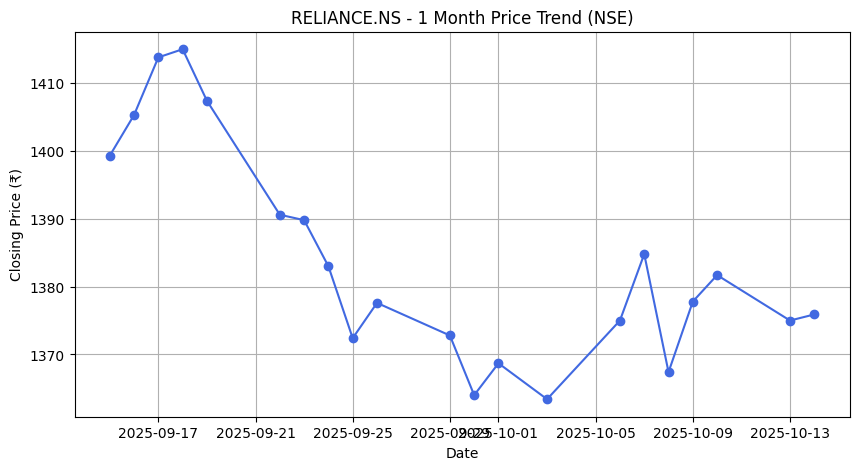

In [ ]:
!pip install yfinance --quiet
import yfinance as yf
import matplotlib.pyplot as plt

# Choose your NSE stock (add ".NS" at the end)
ticker = 'RELIANCE.NS'   # Example: Reliance Industries
stock = yf.Ticker(ticker)

# --- Live Price ---
hist = stock.history(period='1d')
live_price = hist['Close'].iloc[-1]
print(f" Live price of {ticker}: ₹{live_price:.2f}")

# --- Historical Data (for analysis) ---
hist_data = stock.history(period='1mo', interval='1d')
print("\n Last 5 entries of 1-month price data:")
print(hist_data.tail())

# --- Key Fundamentals ---
info = stock.info

beta = info.get('beta')
pe_ratio = info.get('trailingPE')
market_cap = info.get('marketCap')
dividend_yield = info.get('dividendYield')

print("\n Key Financial Metrics:")
print(f"• Beta: {beta}")
print(f"• P/E Ratio: {pe_ratio}")
print(f"• Market Cap: ₹{market_cap:,}" if market_cap else "• Market Cap: Data not available")
print(f"• Dividend Yield: {dividend_yield}")

# --- Visualization ---
plt.figure(figsize=(10,5))
plt.plot(hist_data.index, hist_data['Close'], marker='o', color='royalblue')
plt.title(f'{ticker} - 1 Month Price Trend (NSE)')
plt.xlabel('Date')
plt.ylabel('Closing Price (₹)')
plt.grid(True)
plt.show()


In [ ]:
# Example: if ROI is not already present, create dummy ROI values
import numpy as np

if 'ROI' not in df.columns:
    np.random.seed(42)
    df['ROI'] = np.random.uniform(-10, 25, size=len(df))  # Random ROI between -10% and +25%

# Select features (you can add more relevant columns)
x = df[['Beta']]  # Example features, update as per your dataset
y = df['ROI']

# Handle missing values (if any)
x = x.fillna(x.mean())
#y = y.fillna(y.mean())

# Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train, y_train)

# Predictions
y_pred = rf_reg.predict(x_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📈 Model Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📈 Model Evaluation Metrics:
MAE: 7.83
MSE: 114.45
RMSE: 10.70
R² Score: -0.69


In [ ]:
# Define the portfolios based on the risk categories
conservative_portfolio = df[df['Risk'] == 'Low']['Company'].tolist()
balanced_portfolio = df[df['Risk'] == 'Medium']['Company'].tolist()
aggressive_portfolio = df[df['Risk'] == 'High']['Company'].tolist()

def portfolio_roi(portfolio_list):
    port_df = df[df['Company'].isin(portfolio_list)]
    # Ensure that 'Beta' is treated as numeric for prediction
    port_df['Beta'] = pd.to_numeric(port_df['Beta'], errors='coerce')
    # Fill any NaN values in 'Beta' after conversion, if any
    port_df['Beta'].fillna(port_df['Beta'].mean(), inplace=True)
    pred_roi = rf_reg.predict(port_df[['Beta']].fillna(0)) # Predict using the trained Random Forest Regressor
    return np.mean(pred_roi)

conservative_return = portfolio_roi(conservative_portfolio)
balanced_return = portfolio_roi(balanced_portfolio)
aggressive_return = portfolio_roi(aggressive_portfolio)

print("\n💰 Predicted ROI for Each Dummy Portfolio:")
print(f"Conservative Portfolio ROI: {conservative_return:.2f}%")
print(f"Balanced Portfolio ROI: {balanced_return:.2f}%")
print(f"Aggressive Portfolio ROI: {aggressive_return:.2f}%")


💰 Predicted ROI for Each Dummy Portfolio:
Conservative Portfolio ROI: 6.37%
Balanced Portfolio ROI: 6.35%
Aggressive Portfolio ROI: 6.28%



🎯 Classification Metrics:
Accuracy: 0.33

Classification Report:
               precision    recall  f1-score   support

        High       0.33      0.33      0.33         3
    Moderate       0.00      0.00      0.00         2
    Negative       0.33      0.50      0.40         4

    accuracy                           0.33         9
   macro avg       0.22      0.28      0.24         9
weighted avg       0.26      0.33      0.29         9


Confusion Matrix:
 [[1 0 2]
 [0 0 2]
 [2 0 2]]

AUC Score: 0.36


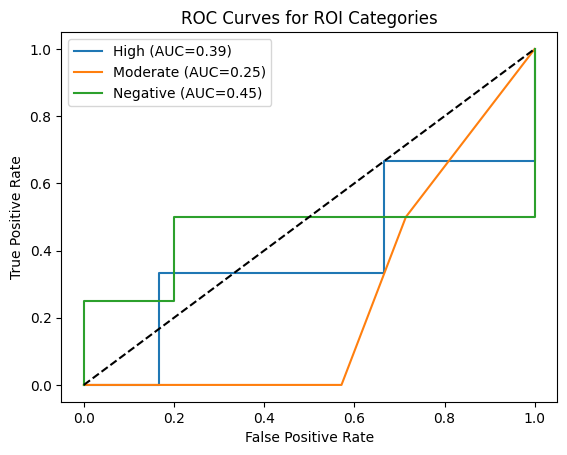

In [ ]:
# Convert ROI to categorical classes
def roi_class(x):
    if x < 0:
        return "Negative"
    elif x < 10:
        return "Moderate"
    else:
        return "High"

df['ROI_Class'] = df['ROI'].apply(roi_class)

# Encode and train classifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_class = le.fit_transform(df['ROI_Class'])

x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

rf_cls = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cls.fit(x_train, y_train)
y_pred_cls = rf_cls.predict(x_test)
y_prob = rf_cls.predict_proba(x_test)

# Evaluation
print("\n🎯 Classification Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_cls):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_cls, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_cls))

# ROC-AUC (for multi-class)
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro')
print(f"\nAUC Score: {roc_auc:.2f}")

# ROC Curve (one vs rest)
for i, class_name in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'{class_name} (AUC={roc_auc_score(y_test_bin[:, i], y_prob[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for ROI Categories')
plt.legend()
plt.show()


In [ ]:
import pickle
pickle.dump(model, open("risk_model.pkl", "wb"))
